# PREDATOR: **PRED**icting the imp**A**ct of cancer somatic mu**T**ations on pr**O**tein-protein inte**R**actions


## Swaney


<b><i class="fa fa-folder-o" area-hidden="true" style="color:#1976D2"> </i>&nbsp; File Location</b><br>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">C:\Users\ibrah\Documents\GitHub\Predicting-Mutation-Effects\src\benchmark\Swaney_Science2021</code>
</p>

<b><i class="far fa-file" area-hidden="true" style="color:#1976D2"> </i>&nbsp; File Name</b>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">PredictionsSwaney.ipynb</code>
</p>

<b><i class="far fa-calendar-alt" area-hidden="true" style="color:#1976D2"> </i>&nbsp; Last Edited</b>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">Nov 06th, 2021</code>
</p>


<div class="alert alert-block" style="background-color: #F5F5F5; border: 1px solid; padding: 10px; border-color: #E0E0E0">
    <b><i class="fa fa-compass" aria-hidden="true" style="color:#404040"></i></b>&nbsp; <b style="color: #404040">Purpose </b> <br>
<div>
   
- [ ] Apply on Swaney et al. interactions.
    
**Dependent files:**

* Target (Swaney) data: 
    - *tba*

In [1]:
import os
import os.path as op

os.chdir("../..")

In [2]:
# Common imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
import random
from pathlib import Path

from pprint import pprint
from IPython.display import display
from tqdm.notebook import tqdm

from helpers.helpers_predator.displayers import (
    display_label_counts, 
    display_labels, 
    visualize_label_counts,
    display_data,
)

from helpers.helpers_predator.visualizers import (
    visualize_sampled_train_datasets_label_counts
)

from helpers.helpers_predator.common import load_predator
from helpers.helpers_predator.common import export_data

# PATHS
SWANEY_PATH = Path(r"../src/benchmark/Swaney_Science2021/found_elaspic_results.txt")
PREDATOR_MODEL_PATH = Path(r"PredatorModels/PredatorModel_2021-10-24/04f37897/predator.pkl")
PREDICTIONS_DATASETS_FOLDER_PATH = "benchmark/Swaney_Science2021/"

# Reflect changes in the modules immediately.
%load_ext autoreload
%autoreload 2

## Load the Predator

In [3]:
predator = load_predator(PREDATOR_MODEL_PATH)

2021-11-07 18:21:45 | INFO     | helpers.helpers_predator.common | Predator object PredatorModels\PredatorModel_2021-10-24\04f37897\predator.pkl is loaded successfully.


## Prediction on Benchmark Dataset

In [4]:
predator.initialize_target_data_materials(
    tcga_code_path_pairs=[('swaney', SWANEY_PATH)]
)

2021-11-07 18:21:45 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `swaney` ..
2021-11-07 18:21:45 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `target_swaney_data` ..
2021-11-07 18:21:45 | DEBUG    | helpers.helpers_predator.data_materials | Initializing target data materials ..
2021-11-07 18:21:45 | DEBUG    | helpers.helpers_predator.data_materials | Determined features: ['Provean_score', 'EL2_score', 'Final_ddG', 'Interactor_alignment_score', 'Solvent_accessibility_wt', 'Matrix_score', 'Solvent_accessibility_mut', 'van_der_waals_mut', 'Interactor_template_sequence_identity', 'solvation_polar_wt']
2021-11-07 18:21:45 | DEBUG    | helpers.helpers_predator.data_materials | Declaring Xs_swaney data materials  ..


#### Swaney Dataset

In [5]:
display_data(predator.data_materials["swaney"])

Data dimensions: (2, 103)


,Input_identifier,UniProt_ID,Mutation,Status,Type,COSMIC_mut_ID,ClinVar_mut_ID,UniProt_mut_ID,Domain_name,Domain_clan,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,P01112,P01112,G12D,done,interface,COSM99915,-,VAR_068816,Ras,Ras,...,648,35.9691,35.7047,493.4220,493.4220,None,None,None,4.84060,4.84060
1,P01112,P01112,G12D,done,interface,COSM99915,-,VAR_068816,Ras,Ras,...,339,123.5670,123.6360,68.5032,68.5032,539.595,324.98,864.585,3.18758,3.18758


#### Preprocessed Swaney Dataset

##### Swaney

In [6]:
display_data(predator.data_materials["target_swaney_data"])

Data dimensions: (2, 61)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Template_sequence_identity,Alignment_score,Interactor_template_sequence_identity,Interactor_alignment_score,Final_ddG,ProtBert_score,ProteinSolver_score,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,P01112,G12D,O15211,1.0000,0.970760,0.2359,0.239415,0.195902,0.998907,0.908300,...,648,35.9691,35.7047,493.4220,493.4220,0.000,0.00,0.000,4.84060,4.84060
1,P01112,G12D,Q13671,0.3086,0.321095,0.3143,0.201405,0.924640,0.998692,0.973106,...,339,123.5670,123.6360,68.5032,68.5032,539.595,324.98,864.585,3.18758,3.18758


### Voting mode: `hard`

In [7]:
predator.predict(voting='hard')

2021-11-07 18:21:47 | DEBUG    | Predator | Predicting on cancer datasets ..
2021-11-07 18:21:47 | DEBUG    | helpers.helpers_predator.models | Initializing EnsambledVotingClassifier.
2021-11-07 18:21:47 | DEBUG    | helpers.helpers_predator.models | Voting mode: hard
2021-11-07 18:21:47 | DEBUG    | helpers.helpers_predator.predictions | Initializing: PredictionsHard
2021-11-07 18:21:47 | DEBUG    | Predator | Predicting on swaney cohort ..
2021-11-07 18:21:47 | DEBUG    | helpers.helpers_predator.models | Current estimator: RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=4,
                       max_features='sqrt', n_estimators=600,
                       random_state=14593)
2021-11-07 18:21:47 | DEBUG    | helpers.helpers_predator.models | X shape: (2, 10)
2021-11-07 18:21:47 | DEBUG    | helpers.helpers_predator.models | Current estimator: RandomForestClassifier(bootstrap=False, max_depth=8, max_features=None,
                       min_samples_leaf=2, 

In [8]:
# Predictions for first 10 experiment.
predator.predictions["swaney"][:3]

[array([1, 1], dtype=int64),
 array([1, 1], dtype=int64),
 array([0, 1], dtype=int64)]

2021-11-07 18:21:49 | DEBUG    | helpers.helpers_predator.predictions | Initializing value counts ..


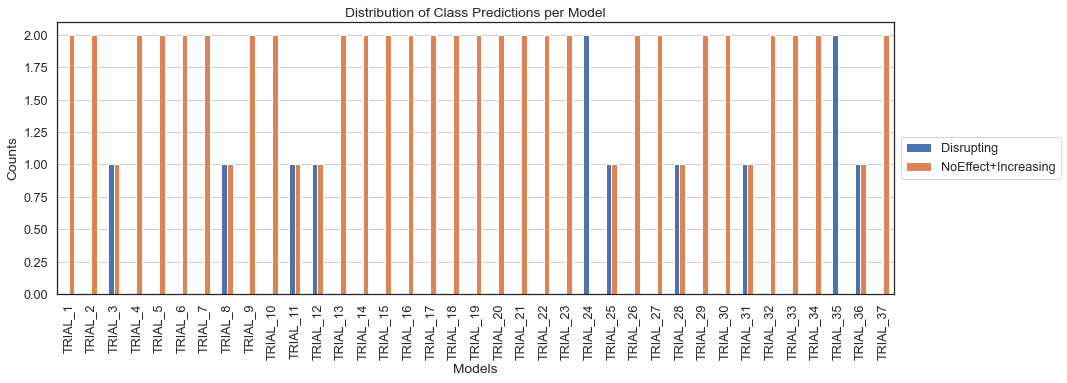

In [9]:
predator.predictions.plot_predictions_distributions("swaney")

#### Predictions Post Processing

Post processing of predictions involves following steps:

##### 1. Merging Predictions with SNV Data

The prediction column is merged with SNV data for each experiment.

$\text{For each experiment } n: $

$$
  \textit{(Prediction Merged Data)}_n = \underbrace{[\textit{Predictions}_n]}_\text{0, 1 or "NoVote"} + 
      \underbrace{[\textit{Protein }] [\textit{Mutation }] [\textit{Interactor }]}_\text{Cancer Data Triplets} + \underbrace{[\textit{Features }] }_\text{Elaspic}
$$


##### 2. Convert to 1-isomer: `Interactor_UniProt_ID`

$\textit{Interactor_UniProt_ID}$ column contains isomer proteins. Here, we convert them into primary isoform representation (i.e. without dashes).

| Interactor_UniProt_ID |
--------------
| P38936     |
| P16473     |
| P16473-2   |
| P19793     |

##### 3. Dropping Invalid Predictions

Entries which predicted as both `Decreasing` and `Increasing+NoEff` are dropped.

Due to having different features for the same $\textit{(protein, mutation, interactor)}$ triplet from ELASPIC, the triplet $\textit{(protein, mutation, interactor)}$ may be classified both 0 and 1. We drop such instances.

In [10]:
predator.predictions_post_process()

2021-11-07 18:21:50 | DEBUG    | helpers.helpers_predator.predictions | PredictionsHard
2021-11-07 18:21:50 | DEBUG    | helpers.helpers_predator.predictions | Post processing predictions for cohort swaney ..
2021-11-07 18:21:50 | DEBUG    | helpers.helpers_predator.predictions | Merging predictions with swaney cancer dataset ..
2021-11-07 18:21:50 | DEBUG    | helpers.helpers_predator.predictions | Handling valid and invalid entries ..


  0%|          | 0/37 [00:00<?, ?it/s]

2021-11-07 18:21:50 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 0): 
Empty DataFrame
Columns: [PREDICTION, PROTEIN, MUTATION, INTERACTOR]
Index: []
2021-11-07 18:21:50 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 0): 
Empty DataFrame
Columns: [PREDICTION, PROTEIN, MUTATION, INTERACTOR]
Index: []
2021-11-07 18:21:50 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 0): 
Empty DataFrame
Columns: [PREDICTION, PROTEIN, MUTATION, INTERACTOR]
Index: []
2021-11-07 18:21:50 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 0): 
Empty DataFrame
Columns: [PREDICTION, PROTEIN, MUTATION, INTERACTOR]
Index: []
2021-11-07 18:21:50 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 0): 
Empty DataFrame
Columns: [PREDICTION, PROTEIN, MUTATION, INTERACTOR]
Index: []
2021-11-07

In [11]:
display_data(predator.predictions["swaney_predicted_datasets"][0])

Data dimensions: (2, 104)


,Prediction,Input_identifier,UniProt_ID,Mutation,Status,Type,COSMIC_mut_ID,ClinVar_mut_ID,UniProt_mut_ID,Domain_name,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,1,P01112,P01112,G12D,done,interface,COSM99915,-,VAR_068816,Ras,...,648,35.9691,35.7047,493.4220,493.4220,None,None,None,4.84060,4.84060
1,1,P01112,P01112,G12D,done,interface,COSM99915,-,VAR_068816,Ras,...,339,123.5670,123.6360,68.5032,68.5032,539.595,324.98,864.585,3.18758,3.18758


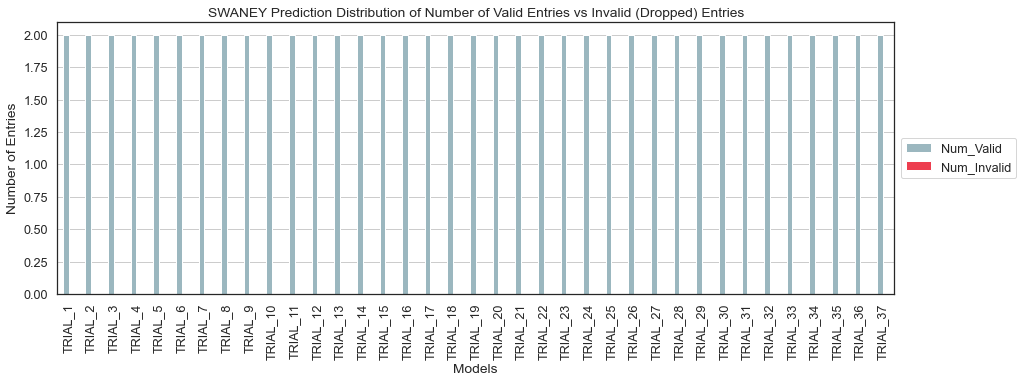

In [12]:
predator.predictions.plot_distribution_valid_vs_invalid("swaney")

2021-11-07 18:21:52 | DEBUG    | helpers.helpers_predator.predictions | Plotting number of finalized predictions per model.
Note that following plot shows the number of (protein, mutation, interactor) triplets which had valid prediction.


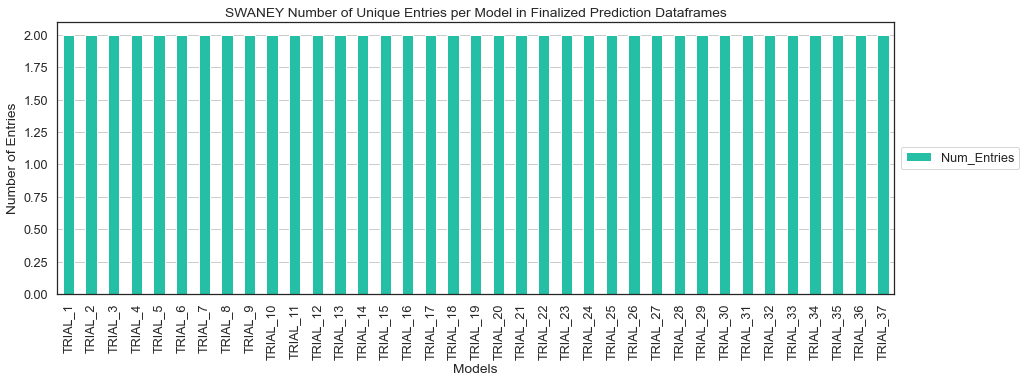

In [13]:
predator.predictions.plot_num_finalized_predictions("swaney")

In [14]:
predator.prepare_ensemble_prediction_data()

2021-11-07 18:21:54 | DEBUG    | helpers.helpers_predator.predictions | PredictionsHard
2021-11-07 18:21:54 | DEBUG    | helpers.helpers_predator.predictions | Preparing ensemble prediction data for swaney ..


  0%|          | 0/2 [00:00<?, ?it/s]

2021-11-07 18:21:54 | DEBUG    | helpers.helpers_predator.predictions | Ensemble prediction data for swaney is prepared.
2021-11-07 18:21:54 | DEBUG    | helpers.helpers_predator.predictions | Resulting prediction data is available for swaney.
Accessible from predictions.['swaney_prediction_results']
2021-11-07 18:21:54 | DEBUG    | helpers.helpers_predator.predictions | Resulting prediction data (no_votes dropped) is available for swaney.
Accessible from predictions.['swaney_prediction_results_no_votes_dropped']


In [15]:
display_data(predator.predictions["swaney_ensemble_prediction_data"])

Data dimensions: (2, 7)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Num_preds_0,Num_preds_1,Num_preds_NO_VOTE,VOTED_PREDICTION
0,P01112,G12D,O15211,8,29,0,1
1,P01112,G12D,Q13671,4,33,0,1


In [16]:
display_data(predator.data_materials["swaney"])

Data dimensions: (2, 103)


,Input_identifier,UniProt_ID,Mutation,Status,Type,COSMIC_mut_ID,ClinVar_mut_ID,UniProt_mut_ID,Domain_name,Domain_clan,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,P01112,P01112,G12D,done,interface,COSM99915,-,VAR_068816,Ras,Ras,...,648,35.9691,35.7047,493.4220,493.4220,None,None,None,4.84060,4.84060
1,P01112,P01112,G12D,done,interface,COSM99915,-,VAR_068816,Ras,Ras,...,339,123.5670,123.6360,68.5032,68.5032,539.595,324.98,864.585,3.18758,3.18758


In [17]:
display_data(predator.data_materials["Xs_swaney"][0])

Data dimensions: (2, 10)


,Provean_score,EL2_score,Final_ddG,Interactor_alignment_score,Solvent_accessibility_wt,Matrix_score,Solvent_accessibility_mut,van_der_waals_mut,Interactor_template_sequence_identity,solvation_polar_wt
0,-4.673,2.465407,0.195902,0.239415,37.2740,-2.0,29.0554,-28.7332,0.2359,41.6423
1,-4.673,2.206550,0.924640,0.201405,54.8345,-2.0,73.5753,-22.6161,0.3143,31.3880


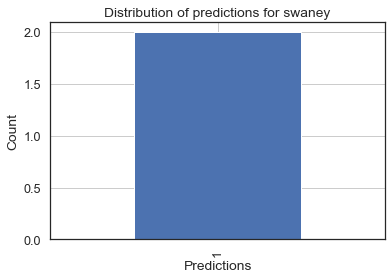

In [18]:
predator.predictions.plot_ensemble_prediction_distribution("swaney")

In [19]:
swaney_prediction_results_hard = predator.predictions["swaney_prediction_results"]
display_data(swaney_prediction_results_hard)

Data dimensions: (2, 4)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction
0,P01112,G12D,O15211,1
1,P01112,G12D,Q13671,1


In [20]:
swaney_ensemble_prediction_data_hard = predator.predictions["swaney_ensemble_prediction_data"]

In [21]:
swaney_prediction_results_hard_no_votes_dropped = predator.predictions["swaney_prediction_results_no_votes_dropped"]
display_data(swaney_prediction_results_hard_no_votes_dropped)

Data dimensions: (2, 4)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction
0,P01112,G12D,O15211,1
1,P01112,G12D,Q13671,1


Label counts:
Increasing + No Effect    2
Name: Prediction, dtype: int64


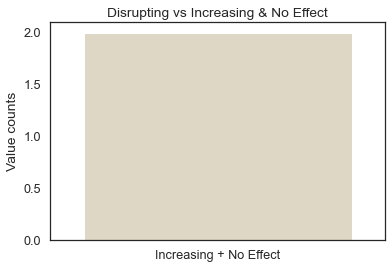

In [22]:
visualize_label_counts(swaney_prediction_results_hard_no_votes_dropped, 'Prediction')

### Voting mode: `soft`

In [23]:
predator.initialize_target_data_materials(
    tcga_code_path_pairs=[('swaney', SWANEY_PATH)]
)

2021-11-07 18:21:56 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `swaney` ..
2021-11-07 18:21:56 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `target_swaney_data` ..
2021-11-07 18:21:57 | DEBUG    | helpers.helpers_predator.data_materials | Initializing target data materials ..
2021-11-07 18:21:57 | DEBUG    | helpers.helpers_predator.data_materials | Determined features: ['Provean_score', 'EL2_score', 'Final_ddG', 'Interactor_alignment_score', 'Solvent_accessibility_wt', 'Matrix_score', 'Solvent_accessibility_mut', 'van_der_waals_mut', 'Interactor_template_sequence_identity', 'solvation_polar_wt']
2021-11-07 18:21:57 | DEBUG    | helpers.helpers_predator.data_materials | Declaring Xs_swaney data materials  ..


In [24]:
predator.predict(voting='soft')

2021-11-07 18:21:57 | DEBUG    | Predator | Predicting on cancer datasets ..
2021-11-07 18:21:57 | DEBUG    | helpers.helpers_predator.models | Initializing EnsambledVotingClassifier.
2021-11-07 18:21:57 | DEBUG    | helpers.helpers_predator.models | Voting mode: soft
2021-11-07 18:21:57 | DEBUG    | helpers.helpers_predator.predictions | Initializing: PredictionsSoft
2021-11-07 18:21:57 | DEBUG    | Predator | Predicting on swaney cohort ..
2021-11-07 18:21:57 | DEBUG    | helpers.helpers_predator.models | Current estimator: RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=4,
                       max_features='sqrt', n_estimators=600,
                       random_state=14593)
2021-11-07 18:21:57 | DEBUG    | helpers.helpers_predator.models | X shape: (2, 10)
2021-11-07 18:21:57 | DEBUG    | helpers.helpers_predator.models | Current estimator: RandomForestClassifier(bootstrap=False, max_depth=8, max_features=None,
                       min_samples_leaf=2, 

In [25]:
predator.predictions.keys()

dict_keys(['swaney_prob'])

In [26]:
# Predictions for first 10 experiment.
predator.predictions["swaney_prob"][:3]

[array([[0.45155915, 0.54844085],
        [0.3869543 , 0.6130457 ]]),
 array([[0., 1.],
        [0., 1.]]),
 array([[0.52764569, 0.47235431],
        [0.37787157, 0.62212843]])]

#### Predictions Post Processing

Post processing of predictions involves following steps:

##### 1. Merging Predictions with SNV Data

The prediction column is merged with SNV data for each experiment.

$\text{For each experiment } n: $

$$
  \textit{(Prediction Merged Data)}_n = \underbrace{[\textit{Predictions}_n]}_\text{Probs Percentages} + 
      \underbrace{[\textit{Protein }] [\textit{Mutation }] [\textit{Interactor }]}_\text{Cancer Data Triplets} + \underbrace{[\textit{Features }] }_\text{Elaspic}
$$


##### 2. Convert to 1-isomer: `Interactor_UniProt_ID`

$\textit{Interactor_UniProt_ID}$ column contains isomer proteins. Here, we convert them into primary isoform representation (i.e. without dashes).

| Interactor_UniProt_ID |
--------------
| P38936     |
| P16473     |
| P16473-2   |
| P19793     |

##### 3. Dropping Invalid Predictions

Entries whose predicted class-1 probability lies in both `Decreasing` and `Increasing+NoEff` are dropped.

Due to having different features for the same $\textit{(protein, mutation, interactor)}$ triplet from ELASPIC, the triplet $\textit{(protein, mutation, interactor)}$ may contain class-1 probability prediction of both lower than 0.50 and higher than 50. We drop such instances.

In [27]:
predator.predictions_post_process()

2021-11-07 18:21:59 | DEBUG    | helpers.helpers_predator.predictions | PredictionsSoft
2021-11-07 18:21:59 | DEBUG    | helpers.helpers_predator.predictions | Post processing predictions for cohort swaney ..
2021-11-07 18:21:59 | DEBUG    | helpers.helpers_predator.predictions | PredictionsSoft
2021-11-07 18:21:59 | DEBUG    | helpers.helpers_predator.predictions | Merging predictions with swaney cancer dataset ..
2021-11-07 18:21:59 | DEBUG    | helpers.helpers_predator.predictions | Handling valid and invalid entries ..


  0%|          | 0/37 [00:00<?, ?it/s]

2021-11-07 18:21:59 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 0): 
Empty DataFrame
Columns: [PREDICTION, PROTEIN, MUTATION, INTERACTOR]
Index: []
2021-11-07 18:21:59 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 0): 
Empty DataFrame
Columns: [PREDICTION, PROTEIN, MUTATION, INTERACTOR]
Index: []
2021-11-07 18:21:59 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 0): 
Empty DataFrame
Columns: [PREDICTION, PROTEIN, MUTATION, INTERACTOR]
Index: []
2021-11-07 18:21:59 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 0): 
Empty DataFrame
Columns: [PREDICTION, PROTEIN, MUTATION, INTERACTOR]
Index: []
2021-11-07 18:21:59 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 0): 
Empty DataFrame
Columns: [PREDICTION, PROTEIN, MUTATION, INTERACTOR]
Index: []
2021-11-07

In [28]:
predator.predictions.keys()

dict_keys(['swaney_prob', 'swaney_predicted_probs_datasets', 'swaney_predicted_valid_datasets', 'swaney_predicted_invalid_datasets', 'swaney_finalized_prediction_dataframes'])

In [29]:
display_data(predator.predictions["swaney_predicted_probs_datasets"][0])

Data dimensions: (2, 104)


,Prediction,Input_identifier,UniProt_ID,Mutation,Status,Type,COSMIC_mut_ID,ClinVar_mut_ID,UniProt_mut_ID,Domain_name,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,0.548441,P01112,P01112,G12D,done,interface,COSM99915,-,VAR_068816,Ras,...,648,35.9691,35.7047,493.4220,493.4220,None,None,None,4.84060,4.84060
1,0.613046,P01112,P01112,G12D,done,interface,COSM99915,-,VAR_068816,Ras,...,339,123.5670,123.6360,68.5032,68.5032,539.595,324.98,864.585,3.18758,3.18758


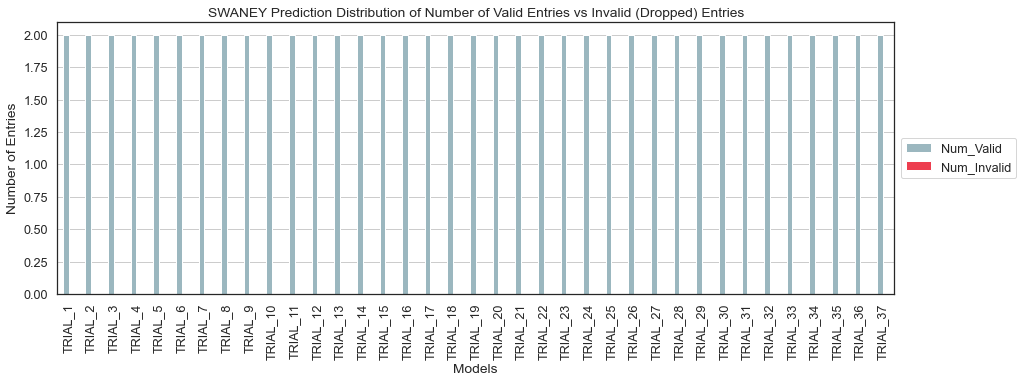

In [30]:
predator.predictions.plot_distribution_valid_vs_invalid("swaney")

2021-11-07 18:22:01 | DEBUG    | helpers.helpers_predator.predictions | Plotting number of finalized predictions per model.
Note that following plot shows the number of (protein, mutation, interactor) triplets which had valid prediction.


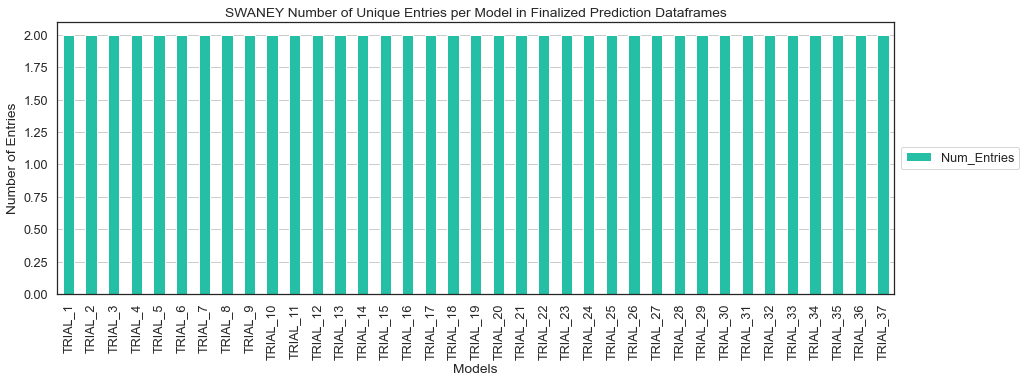

In [31]:
predator.predictions.plot_num_finalized_predictions("swaney")

In [32]:
display_data(predator.predictions['swaney_finalized_prediction_dataframes'][0])

Data dimensions: (2, 4)


,Prediction,UniProt_ID,Mutation,Interactor_UniProt_ID
0,0.548441,P01112,G12D,O15211
1,0.613046,P01112,G12D,Q13671


In [33]:
predator.prepare_ensemble_prediction_data()

2021-11-07 18:22:02 | INFO     | helpers.helpers_predator.predictions | PredictionsSoft
2021-11-07 18:22:02 | INFO     | helpers.helpers_predator.predictions | Preparing ensemble prediction data for swaney taking median ..


  0%|          | 0/37 [00:00<?, ?it/s]

2021-11-07 18:22:03 | DEBUG    | helpers.helpers_predator.predictions | Prediction probabilities data for swaney is prepared.
Accessible from `swaney_predictions_prob_data`.
2021-11-07 18:22:03 | DEBUG    | helpers.helpers_predator.predictions | Ensemble prediction data for swaney is prepared.
Accessible from `swaney_ensemble_prediction_data`.
2021-11-07 18:22:03 | DEBUG    | helpers.helpers_predator.predictions | Resulting prediction data is available for swaney.
Accessible from predictions.['swaney_prediction_results']
2021-11-07 18:22:03 | DEBUG    | helpers.helpers_predator.predictions | Resulting prediction data (no_votes dropped) is available for swaney.
Accessible from predictions.['swaney_prediction_results_no_votes_dropped']


In [34]:
display_data(predator.predictions['swaney_predictions_prob_data'])

Data dimensions: (2, 39)


,Trial 0,Trial 1,Trial 2,Trial 3,Trial 4,Trial 5,Trial 6,Trial 7,Trial 8,Trial 9,...,Trial 29,Trial 30,Trial 31,Trial 32,Trial 33,Trial 34,Trial 35,Trial 36,PROB_1s_AVG,VOTED_PREDICTION
0,0.548441,1.0,0.472354,0.538169,0.581158,0.541193,0.557226,0.499086,0.611027,0.562191,...,0.602150,0.600000,0.634261,0.502458,0.572121,0.460245,0.481496,0.646127,0.56679,1
1,0.613046,1.0,0.622128,0.664513,0.801900,0.617700,0.554070,0.526052,0.530007,0.609704,...,0.744468,0.381602,0.705312,0.642453,0.563068,0.466925,0.590284,0.733755,0.61075,1


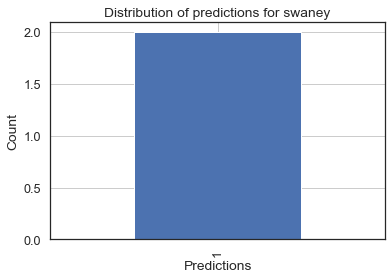

In [35]:
predator.predictions.plot_ensemble_prediction_distribution("swaney")

In [36]:
swaney_prediction_results_soft = predator.predictions['swaney_prediction_results']
display_data(swaney_prediction_results_soft)

Data dimensions: (2, 4)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction
0,P01112,G12D,O15211,1
1,P01112,G12D,Q13671,1


In [37]:
swaney_prediction_results_soft_no_votes_dropped = predator.predictions["swaney_prediction_results_no_votes_dropped"]
display_data(swaney_prediction_results_soft_no_votes_dropped)

Data dimensions: (2, 4)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction
0,P01112,G12D,O15211,1
1,P01112,G12D,Q13671,1


Label counts:
Increasing + No Effect    2
Name: Prediction, dtype: int64


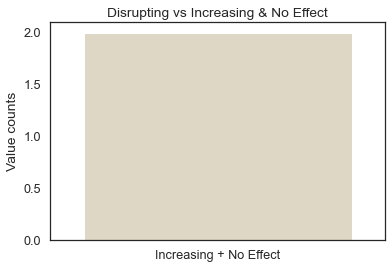

In [38]:
visualize_label_counts(swaney_prediction_results_soft_no_votes_dropped, 'Prediction')

In [39]:
swaney_ensemble_prediction_data_soft = predator.predictions["swaney_ensemble_prediction_data"]

In [40]:
swaney_predictions_prob_data_soft = predator.predictions["swaney_predictions_prob_data"]

## Exporting Predictions

In [41]:
# swaney_prediction_results = swaney_prediction_results_hard_no_votes_dropped
swaney_prediction_results = swaney_prediction_results_soft_no_votes_dropped
display_data(swaney_prediction_results)

Data dimensions: (2, 4)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction
0,P01112,G12D,O15211,1
1,P01112,G12D,Q13671,1


In [43]:
predator.export_prediction(
    tcga="swaney",
    data=swaney_prediction_results,
    file_name="predictions",
    folder_path=PREDICTIONS_DATASETS_FOLDER_PATH,
    voting="soft",
    overwrite=False,
    file_extension='csv'
)

2021-11-07 18:22:25 | DEBUG    | helpers.helpers_predator.common | Folder with ID 0ab552ea is created.
2021-11-07 18:22:25 | DEBUG    | helpers.helpers_predator.common | Exporting data predictions at location benchmark/Swaney_Science2021/ in folder swaney_prediction_2021-11-07\0ab552ea..
2021-11-07 18:22:25 | INFO     | helpers.helpers_predator.common | benchmark/Swaney_Science2021/swaney_prediction_2021-11-07\0ab552ea\predictions_soft_2021-11-07.csv is exported successfully.
2021-11-07 18:22:25 | INFO     | helpers.helpers_predator.common | Config is exported.
